In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
sns.set(style = 'dark')
import random
from collections import Counter as counter

import os
import warnings

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [9]:
fifa = pd.read_csv('data.csv',index_col=0)
columns = fifa.columns

In [10]:
columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

# THE (Real) BEST Player


We all can agree that The Best Player awards were... *vague*. ***Let's rectify that.***

The simple objective is to find the best player based on various attributes!

### The Overall Rating

So, what's the average distribution of overall rating? 

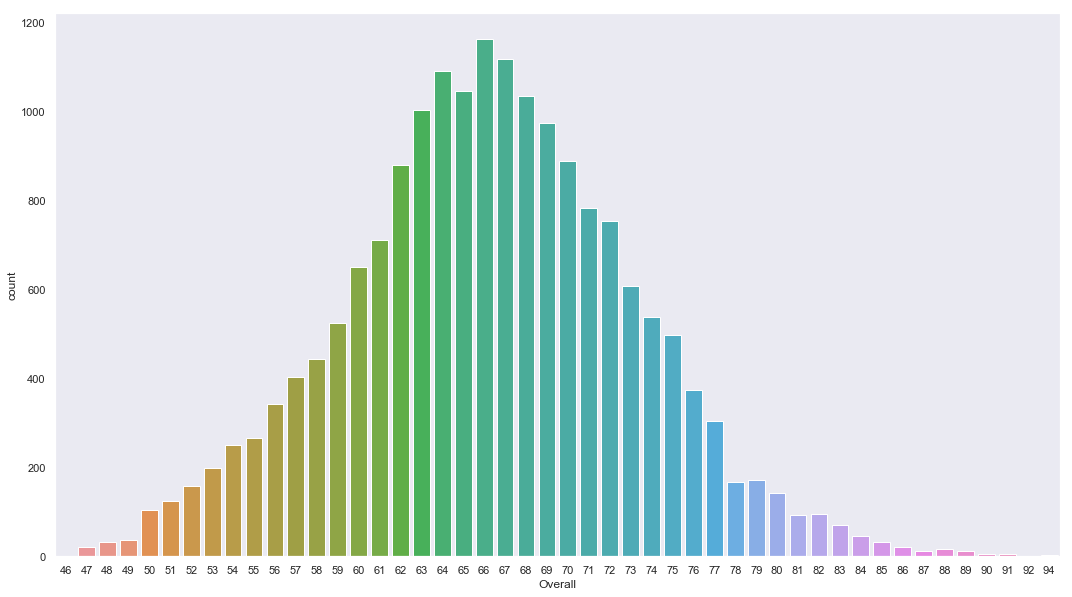

In [13]:
plt.figure(figsize=(18,10)) 
sns.countplot(fifa['Overall'])
plt.set_title('')
plt.show()

Looks like we have quite a normal distribution here. Kudos to the FIFA team on that.

Not surprised though, I expected something similar. Most players are average, some are just disappointingly wasted, and some extend all the way to extreme levels of awesomeness.

Moving on...

### The Eldest Players

In [15]:
fifa.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head(5)

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41


Not going to lie, I've **never** heard of these players. But a look at their overall might explain it!


### The Youngest Players 

In [18]:
fifa.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age','Potential' ]].head(5)

,Name,Club,Nationality,Overall,Age,Potential
18206,G. Nugent,Tranmere Rovers,England,46,16,66
17743,J. Olstad,Sarpsborg 08 FF,Norway,52,16,69
13293,H. Massengo,AS Monaco,France,62,16,75
16081,J. Italiano,Perth Glory,Australia,58,16,79
18166,N. Ayéva,Örebro SK,Sweden,48,16,72


Again, who are they even? 

Sure does look like my boy, Massengo has a bright future. 

### The Best Freekick Takers

In [26]:
fifa.sort_values(by = 'FKAccuracy' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','FKAccuracy']].head(5)

,Name,Club,Nationality,Overall,Age,FKAccuracy
0,L. Messi,FC Barcelona,Argentina,94,31,94.0
293,S. Giovinco,Toronto FC,Italy,82,31,93.0
72,M. Pjanić,Juventus,Bosnia Herzegovina,86,28,92.0
1113,E. Bardhi,Levante UD,FYR Macedonia,77,22,91.0
449,H. Çalhanoğlu,Milan,Turkey,80,24,90.0


Okay, this is clearly no surprise. Messi at the top makes sense. 

But Ronaldo not in the top 5? What's up EA? 

### The Best Penalty Kick Taker

In [37]:
fifa.sort_values(by = 'Penalties' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Penalties']].head(5)

,Name,Club,Nationality,Overall,Age,Penalties
206,M. Balotelli,OGC Nice,Italy,83,27,92.0
118,Fabinho,Liverpool,Brazil,84,24,91.0
16,H. Kane,Tottenham Hotspur,England,89,24,90.0
297,M. Kruse,SV Werder Bremen,Germany,82,30,90.0
945,L. Baines,Everton,England,77,33,90.0


Wow, I thought Ronaldo would definitely make at least this list. Apparently not!

## Famous Clubs


### Age Distribution

Let's start with the age distributuion in these clubs. My bet : Barcelona will top this list given the number of old players they have. 

In [47]:
clubs = ['Tottenham Hotspur' , 'Juventus' , 'Paris Sain-Germain' ,'FC Bayern München',
       'Real Madrid' , 'FC Barcelona' , 'Borussia Dortmund' , 'Manchester United' , 
       'FC Porto','Liverpool','Manchester City']

Questionable decision addning Liverpool, I know. 

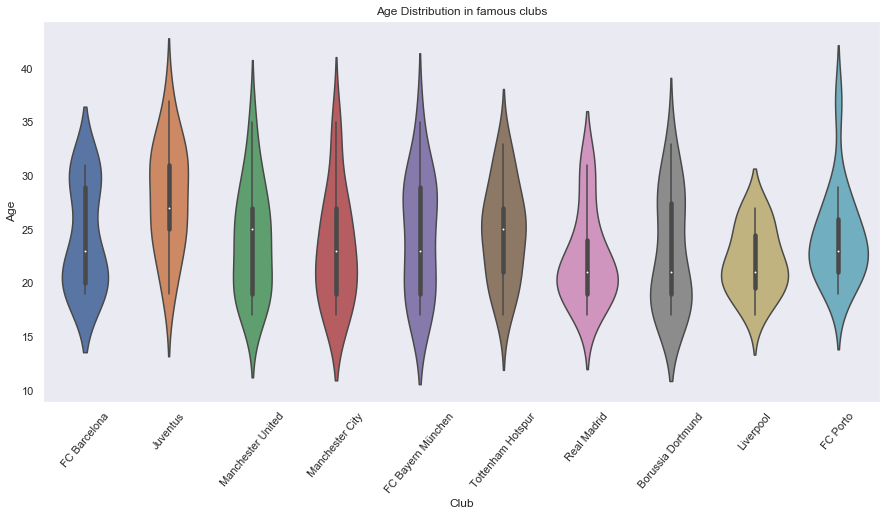

In [49]:
fifa_club_age = fifa.loc[fifa['Club'].isin(clubs) & fifa['Age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Club' , y = 'Age' , data = fifa_club_age)
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Well, that's something. 

Looks like Real Madrid, Liverrpool and Porto have the most young talent. Good to know!

### Overall Rating

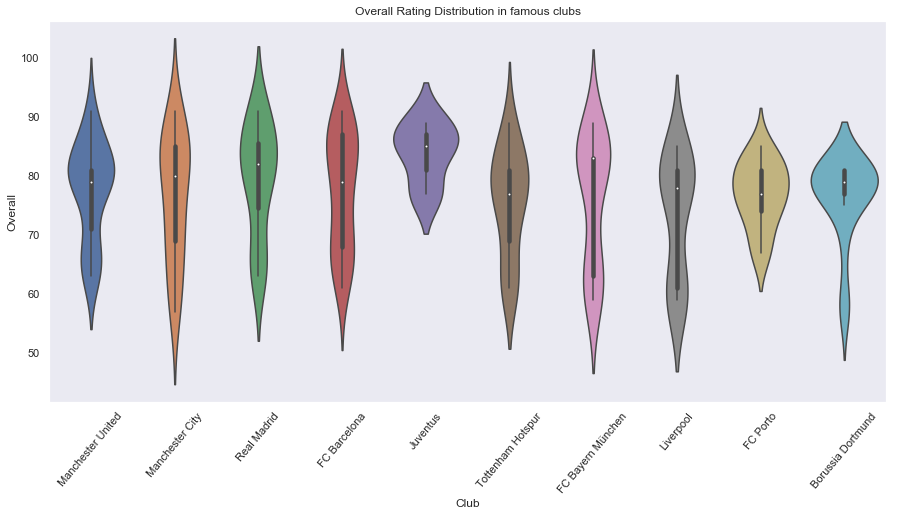

In [50]:
fifa_club_rating = fifa.loc[fifa['Club'].isin(clubs) & fifa['Overall']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Club' , y = 'Overall' , data = fifa_club_rating)
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Woah, look at Juventus go. Pretty sure they'll lead in Freekick Accuracy as well.

Really surprised by Barcelona and Real Madrid though. Ah, the things data can tell you :smile:

## Popular Countries

### Age Distribution

In [52]:
countries = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
             'Italy' , 'Spain' , 'Germany' ,'Netherlands','India']

India, you ask? Can't not. My country afer all!

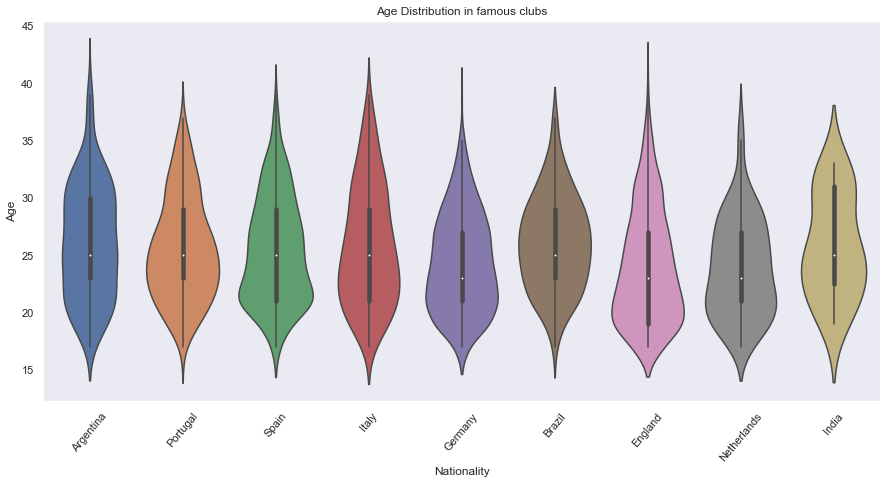

In [57]:
fifa_country_age = fifa.loc[fifa['Nationality'].isin(countries) & fifa['Age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Nationality' , y = 'Age' , data = fifa_country_age)
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Looks like it might finally be good times for England maybe? 

But hey, Spain and Germany aren't too far behind either. 

Guess the Overall Rating can tell us more. 


### Overall Rating

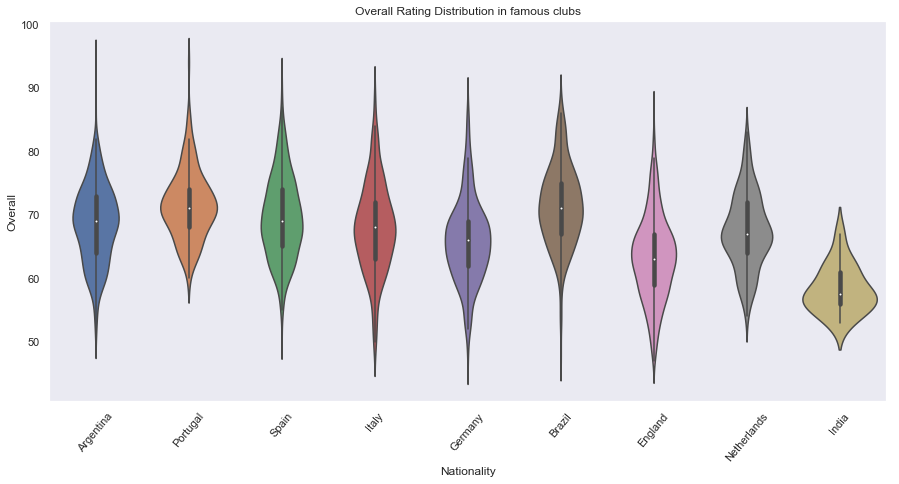

In [58]:
fifa_country_rating = fifa.loc[fifa['Nationality'].isin(countries) & fifa['Overall']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Nationality' , y = 'Overall' , data = fifa_country_age)
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Brazil really seems to be pretty dominant here. Must be the experienced players, as the previous plost have shown us. 

# The Top 10 Players

Ah, the thing you've all been waiting for. 

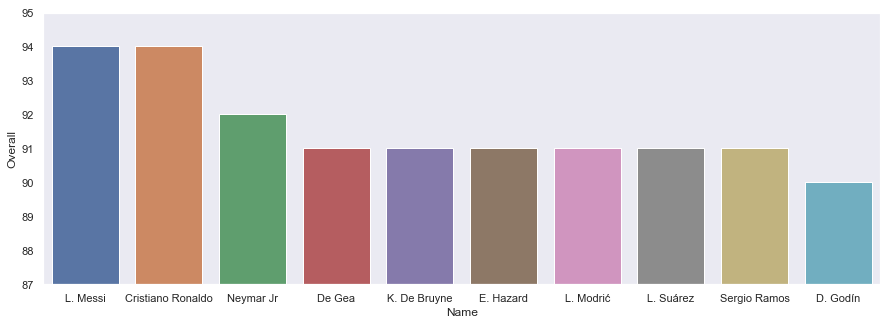

In [74]:
fifa_best_players = pd.DataFrame.copy(fifa.sort_values(by = 'Overall' , ascending = False ).head(10))

plt.figure(1 , figsize = (15 , 5))
sns.barplot(x ='Name' , y = 'Overall' , data = fifa_best_players)

plt.ylim(87 , 95)
plt.show()